<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/Introduction_%C3%A0_l'inf%C3%A9rence_Bay%C3%A9sienne_avec_une_loi_de_Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import matplotlib
import matplotlib.pyplot as plt
# for displaying images
from IPython.core.display import Image
from IPython.core.display import HTML 
# import seaborn
import seaborn as sns
import numpy as np
from scipy.stats import beta, bernoulli
# settings for seaborn plotting style
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


On veut étudier l'inférence Bayésienne pour un phénomène aléatoire que l'on modélise avec une loi de Bernoulli. On sait que la loi de Bernoulli est conjuguée à la loi Beta. Donc pour estimer l'a posteriori, on va utiliser ces lois conjuguées. La difficulté cependant consiste à choisir un bon a priori au sein de la loi Beta.

Dans la suite on présente plusieurs a priori basé sur la loi Beta représentant différente croyance a priori.

On peut choisir les a priori suivants

* Un a priori uniforme, on assigne $a = b = 1$. 
* L'a priori de Jeffrey, ou $a = b = \frac{1}{2}$.
* L'a priori de Haldane ou $a = b = 0$. 
* La moitié forte ou *Strong-Half* ou $a = b = 100$.

### Question
Essayez chaque a priori et tracer la loi correspondante. 
* Comment interprétez-vous la signification de chaque a priori ?

PS: Pour des raisons numériques, concernant l'a priori de Haldane entrez des petites valeurs comme 0.0001 et 0.0001 car la simulation n'accepte pas 0.

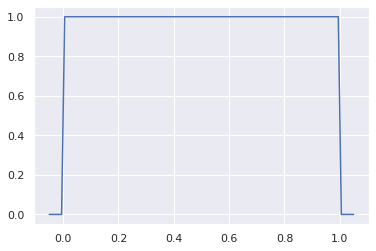

In [5]:
#@title Densité des a priori
a =  1#@param {type:"number"}
b =  1#@param {type:"number"}
size = 10000
beta_sample = beta.rvs(a=a, b=b, loc = 0, scale = 1, size = size)

# ax = sns.distplot(beta_sample,
#                   bins=100,
#                   kde=True,
#                   color='skyblue',
#                   hist_kws={"linewidth": 15,'alpha':1})
# ax.set(xlabel='Loi beta ', ylabel='Fréquence')

x = np.linspace(-0.05,1.05, 100)
plt.plot(x, beta.pdf(x, a,b))

Maintenant qu'on a vu quelques a priori, on va automatiquement détermnier l'a posteriori que l'on aurait en fonction d'un échantillon.

## Question
* Rappellez la fonction de calcul de l'a posteriori d'une v.a d'un modèle ayant une vraisemblance de Bernoulli.
* Détermniez le code de la fonction `bernoulli_posterior` qui détermine les paramètres de l'a posteriori après avoir vu les données.

In [1]:
def bernoulli_posterior(taille_echantillon, prior_a, prior_b, vrai_parametre):
  """
  Cette fonction calcule l'a posteriori apres avoir observe un jeu de donnees simule suivant une loi de Bernoulli
  de parametre vrai_parametre, et ayant un a priori modelise par une loi Beta(prior_a, prior_b)
  Input:
    taille_echantillon: Int. Nombre d'exemples a generer
    prior_a, prior_b. Floats. Ce sont les parametres de la loi beta a priori
    vrai_parametre: Float. Parametre de Bernoulli representant les donnees a generer il est compris entre 0 et 1.
    Ce parametre est inconnue du modele, il represente le phenomene inconnu que l'on cherche a modeliser.
  Output:
    posterior_a, posterior_b: Floats. Les parametres de l'a posteriori.
  """
  echantillon = bernoulli.rvs(taille_echantillon, vrai_parametre)
  N0 = np.sum(echantillon == 0) 
  N1 = np.sum(echantillon == 1)
  return N1 + prior_a, N0 + prior_b, echantillon


Text(0.5, 1.0, 'Loi a posteriori')

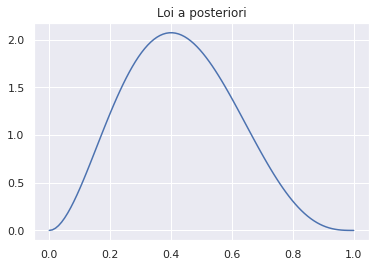

In [ ]:
#@title Densité a posteriori
prior_a =  1#@param {type:"number"}
prior_b =  1#@param {type:"number"}
taille_echantillon =  5#@param {type:"number"}
vrai_parametre = 0.5 #@param {type:"number"}
size = 10000

posterior_a, posterior_b, echantillon = bernoulli_posterior(taille_echantillon, prior_a, prior_b, vrai_parametre)
print(echantillon)

beta_sample = beta.rvs(a=posterior_a, b=posterior_b, loc = 0, scale = 1, size = size)

x = np.linspace(-0.05,1.05, 100)
plt.plot(x, beta.pdf(x, posterior_a, posterior_b))
plt.title("Loi a posteriori")
